In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
Ames_df=pd.read_csv('../Machine_Learning/Datasets/Ames_Housing_Data.csv')

In [45]:
Ames_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [46]:
Ames_df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## #Feature Engineering

In [47]:
Ames=Ames_df[['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice']]

In [48]:
Ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2930 non-null   int64  
 1   Lot Frontage     2440 non-null   float64
 2   Lot Area         2930 non-null   int64  
 3   Overall Qual     2930 non-null   int64  
 4   Overall Cond     2930 non-null   int64  
 5   Year Built       2930 non-null   int64  
 6   Year Remod/Add   2930 non-null   int64  
 7   Mas Vnr Area     2907 non-null   float64
 8   BsmtFin SF 1     2929 non-null   float64
 9   BsmtFin SF 2     2929 non-null   float64
 10  Bsmt Unf SF      2929 non-null   float64
 11  Total Bsmt SF    2929 non-null   float64
 12  1st Flr SF       2930 non-null   int64  
 13  2nd Flr SF       2930 non-null   int64  
 14  Low Qual Fin SF  2930 non-null   int64  
 15  Gr Liv Area      2930 non-null   int64  
 16  Bsmt Full Bath   2928 non-null   float64
 17  Bsmt Half Bath

In [49]:
Ames.corr()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
MS SubClass,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,-0.060075,-0.070946,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,0.215583,0.045999,...,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318
Lot Area,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,0.191555,0.083150,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,0.284118,-0.041287,...,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,-0.050935,0.041134,...,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,0.279870,-0.027415,...,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,0.151790,-0.062129,...,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,0.301872,-0.016019,...,0.165467,0.143748,-0.110787,0.013778,0.065643,0.004617,0.044934,-0.000276,-0.017715,0.508285
BsmtFin SF 1,-0.060075,0.215583,0.191555,0.284118,-0.050935,0.279870,0.151790,0.301872,1.000000,-0.054129,...,0.224010,0.124947,-0.100455,0.050541,0.095874,0.084140,0.092886,-0.001155,0.022397,0.432914
BsmtFin SF 2,-0.070946,0.045999,0.083150,-0.041287,0.041134,-0.027415,-0.062129,-0.016019,-0.054129,1.000000,...,0.098528,-0.005587,0.032380,-0.023325,0.062951,0.044398,-0.005204,-0.009484,0.007105,0.005891


In [50]:
Ames.corr()['SalePrice'] > 0.4 

MS SubClass        False
Lot Frontage       False
Lot Area           False
Overall Qual        True
Overall Cond       False
Year Built          True
Year Remod/Add      True
Mas Vnr Area        True
BsmtFin SF 1        True
BsmtFin SF 2       False
Bsmt Unf SF        False
Total Bsmt SF       True
1st Flr SF          True
2nd Flr SF         False
Low Qual Fin SF    False
Gr Liv Area         True
Bsmt Full Bath     False
Bsmt Half Bath     False
Full Bath           True
Half Bath          False
Bedroom AbvGr      False
Kitchen AbvGr      False
TotRms AbvGrd       True
Fireplaces          True
Garage Yr Blt       True
Garage Cars         True
Garage Area         True
Wood Deck SF       False
Open Porch SF      False
Enclosed Porch     False
3Ssn Porch         False
Screen Porch       False
Pool Area          False
Misc Val           False
Mo Sold            False
Yr Sold            False
SalePrice           True
Name: SalePrice, dtype: bool

In [51]:
new_df=Ames[['Overall Qual','Year Built','Year Remod/Add','Mas Vnr Area','BsmtFin SF 1','1st Flr SF','Total Bsmt SF','Full Bath','Gr Liv Area',
'TotRms AbvGrd','Fireplaces','Garage Yr Blt','Garage Cars','Garage Area','SalePrice']]

In [52]:
new_df.isna().sum()

Overall Qual        0
Year Built          0
Year Remod/Add      0
Mas Vnr Area       23
BsmtFin SF 1        1
1st Flr SF          0
Total Bsmt SF       1
Full Bath           0
Gr Liv Area         0
TotRms AbvGrd       0
Fireplaces          0
Garage Yr Blt     159
Garage Cars         1
Garage Area         1
SalePrice           0
dtype: int64

In [53]:
new_df.describe()

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,1st Flr SF,Total Bsmt SF,Full Bath,Gr Liv Area,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,SalePrice
count,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2930.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2771.000000,2929.000000,2929.000000,2930.000000
mean,6.094881,1971.356314,1984.266553,101.896801,442.629566,1159.557679,1051.614544,1.566553,1499.690444,6.443003,0.599317,1978.132443,1.766815,472.819734,180796.060068
std,1.411026,30.245361,20.860286,179.112611,455.590839,391.890885,440.615067,0.552941,505.508887,1.572964,0.647921,25.528411,0.760566,215.046549,79886.692357
min,1.000000,1872.000000,1950.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,12789.000000
25%,5.000000,1954.000000,1965.000000,0.000000,0.000000,876.250000,793.000000,1.000000,1126.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,129500.000000
50%,6.000000,1973.000000,1993.000000,0.000000,370.000000,1084.000000,990.000000,2.000000,1442.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,160000.000000
75%,7.000000,2001.000000,2004.000000,164.000000,734.000000,1384.000000,1302.000000,2.000000,1742.750000,7.000000,1.000000,2002.000000,2.000000,576.000000,213500.000000
max,10.000000,2010.000000,2010.000000,1600.000000,5644.000000,5095.000000,6110.000000,4.000000,5642.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,755000.000000


In [54]:
new_df['Mas Vnr Area'].value_counts()

0.0       1748
120.0       15
176.0       13
200.0       13
216.0       12
          ... 
714.0        1
647.0        1
1290.0       1
495.0        1
443.0        1
Name: Mas Vnr Area, Length: 445, dtype: int64

In [55]:
new_df['Mas Vnr Area'].fillna(0.0,inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_11508\6789119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Mas Vnr Area'].fillna(0.0,inplace=True)


In [56]:
new_df['Garage Yr Blt'].value_counts()

2005.0    142
2007.0    115
2006.0    115
2004.0     99
2003.0     92
         ... 
1933.0      1
2207.0      1
1896.0      1
1943.0      1
1919.0      1
Name: Garage Yr Blt, Length: 103, dtype: int64

In [57]:
new_df['Garage Yr Blt'].fillna(np.mean(new_df['Garage Yr Blt']),inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_11508\3366214010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Garage Yr Blt'].fillna(np.mean(new_df['Garage Yr Blt']),inplace=True)


In [58]:
new_df.isna().sum()

Overall Qual      0
Year Built        0
Year Remod/Add    0
Mas Vnr Area      0
BsmtFin SF 1      1
1st Flr SF        0
Total Bsmt SF     1
Full Bath         0
Gr Liv Area       0
TotRms AbvGrd     0
Fireplaces        0
Garage Yr Blt     0
Garage Cars       1
Garage Area       1
SalePrice         0
dtype: int64

In [59]:
new_df.dropna(inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_11508\1925939579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.dropna(inplace=True)


In [60]:
new_df.isna().sum() > 1

Overall Qual      False
Year Built        False
Year Remod/Add    False
Mas Vnr Area      False
BsmtFin SF 1      False
1st Flr SF        False
Total Bsmt SF     False
Full Bath         False
Gr Liv Area       False
TotRms AbvGrd     False
Fireplaces        False
Garage Yr Blt     False
Garage Cars       False
Garage Area       False
SalePrice         False
dtype: bool

## #Data Visualization

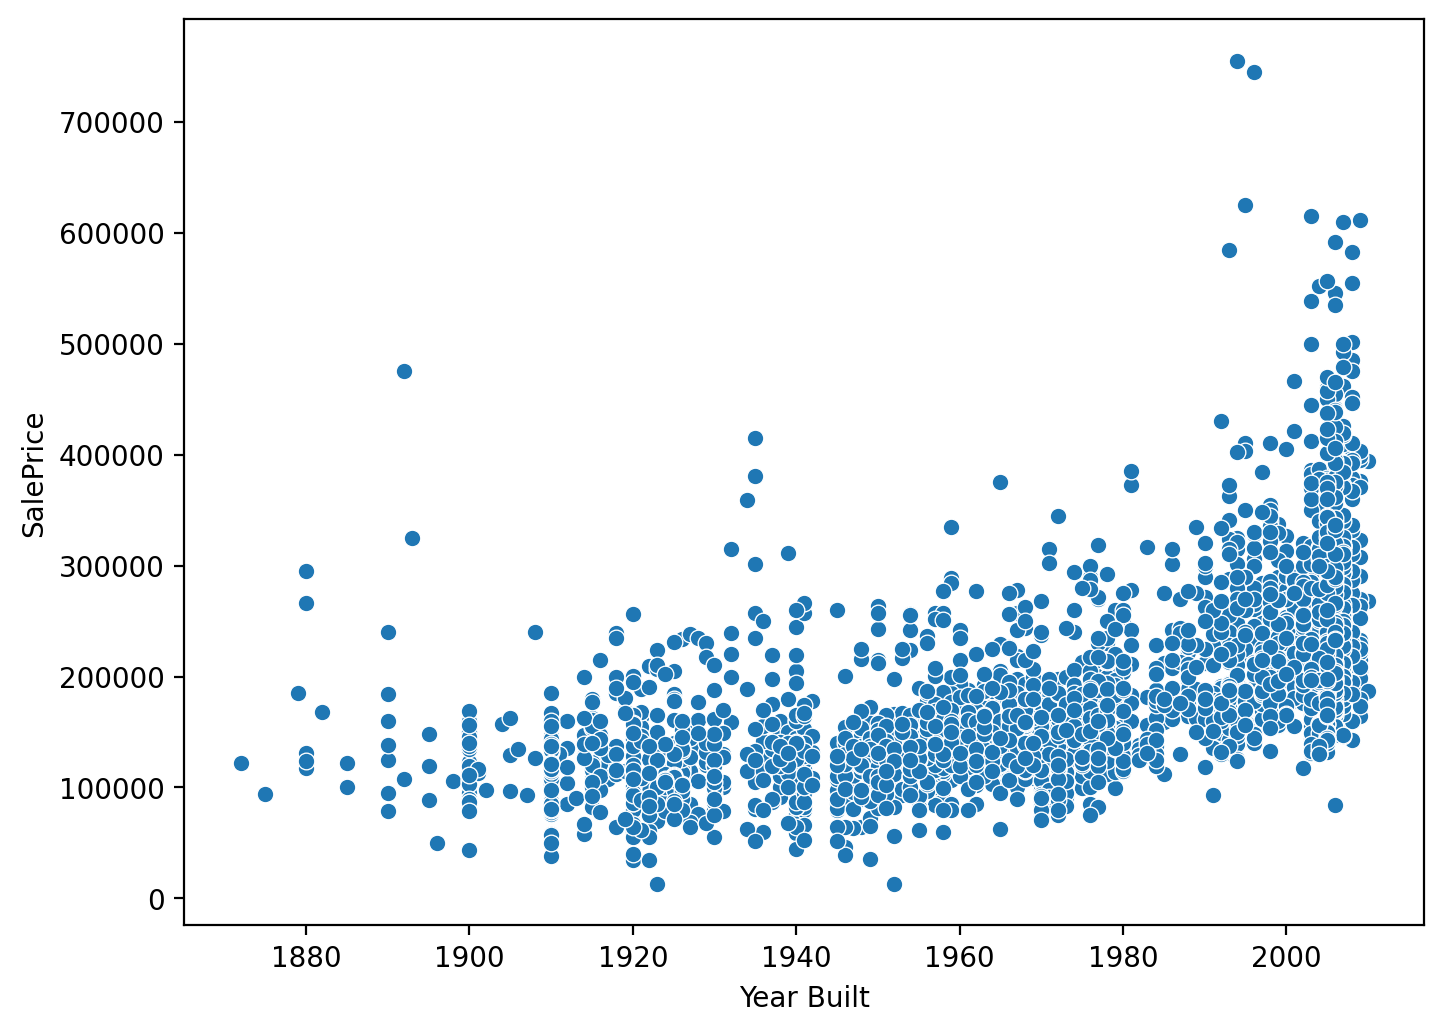

In [62]:
plt.figure(figsize=(8,6),dpi=200)
sns.scatterplot(data=new_df,x='Year Built',y='SalePrice')
plt.show()

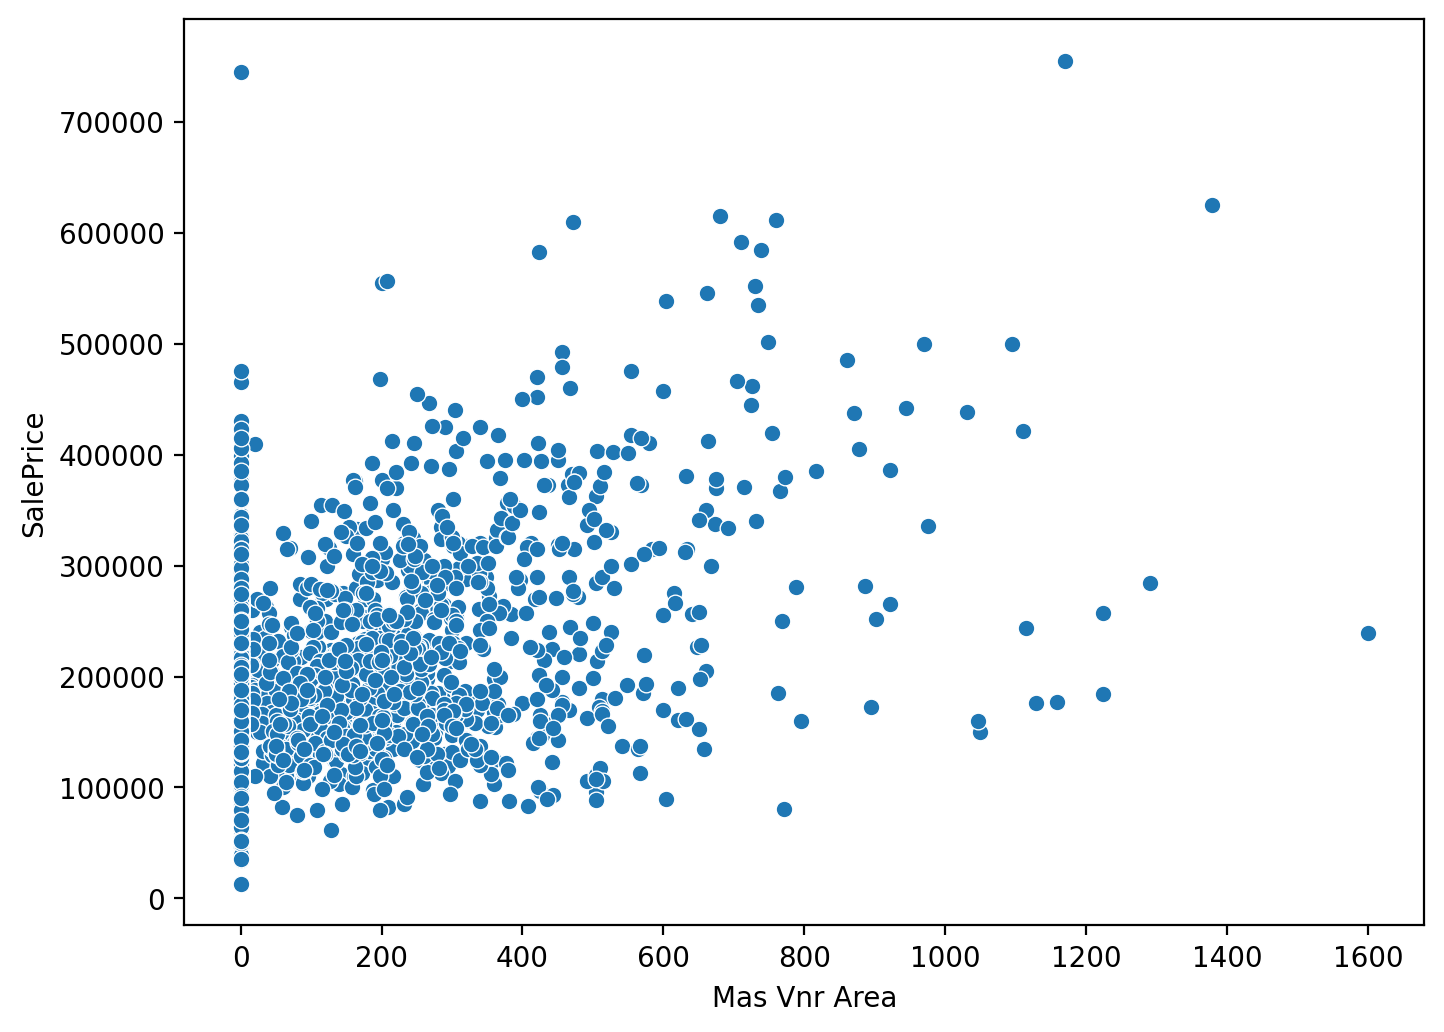

In [63]:
plt.figure(figsize=(8,6),dpi=200)
sns.scatterplot(data=new_df,x='Mas Vnr Area',y='SalePrice')
plt.show()

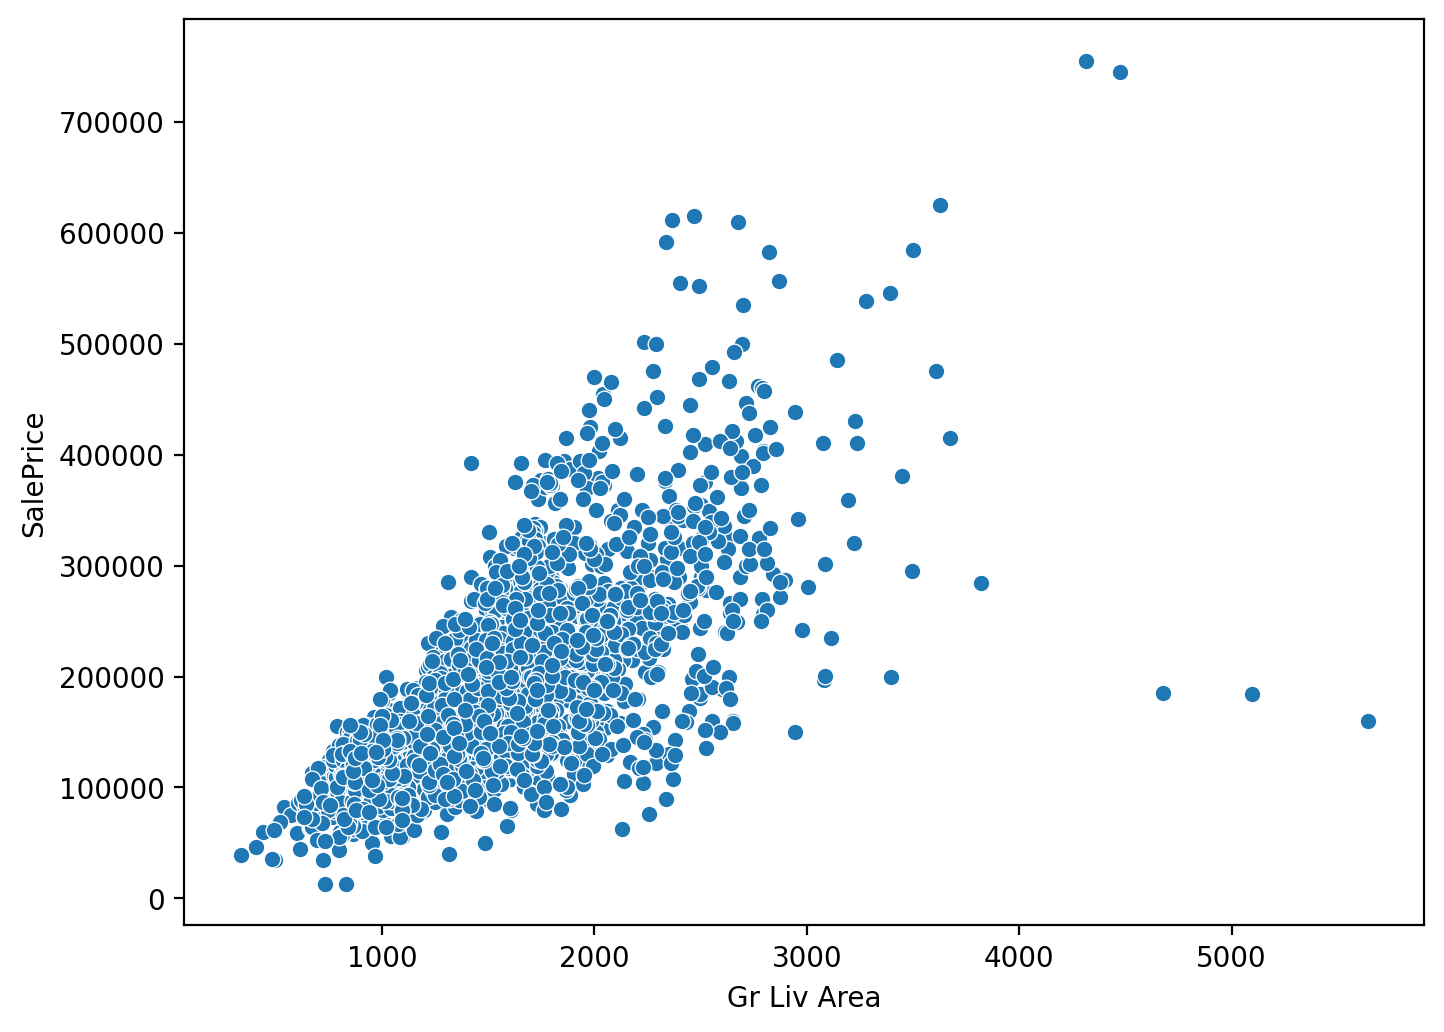

In [64]:
plt.figure(figsize=(8,6),dpi=200)
sns.scatterplot(data=new_df,x='Gr Liv Area',y='SalePrice')
plt.show()

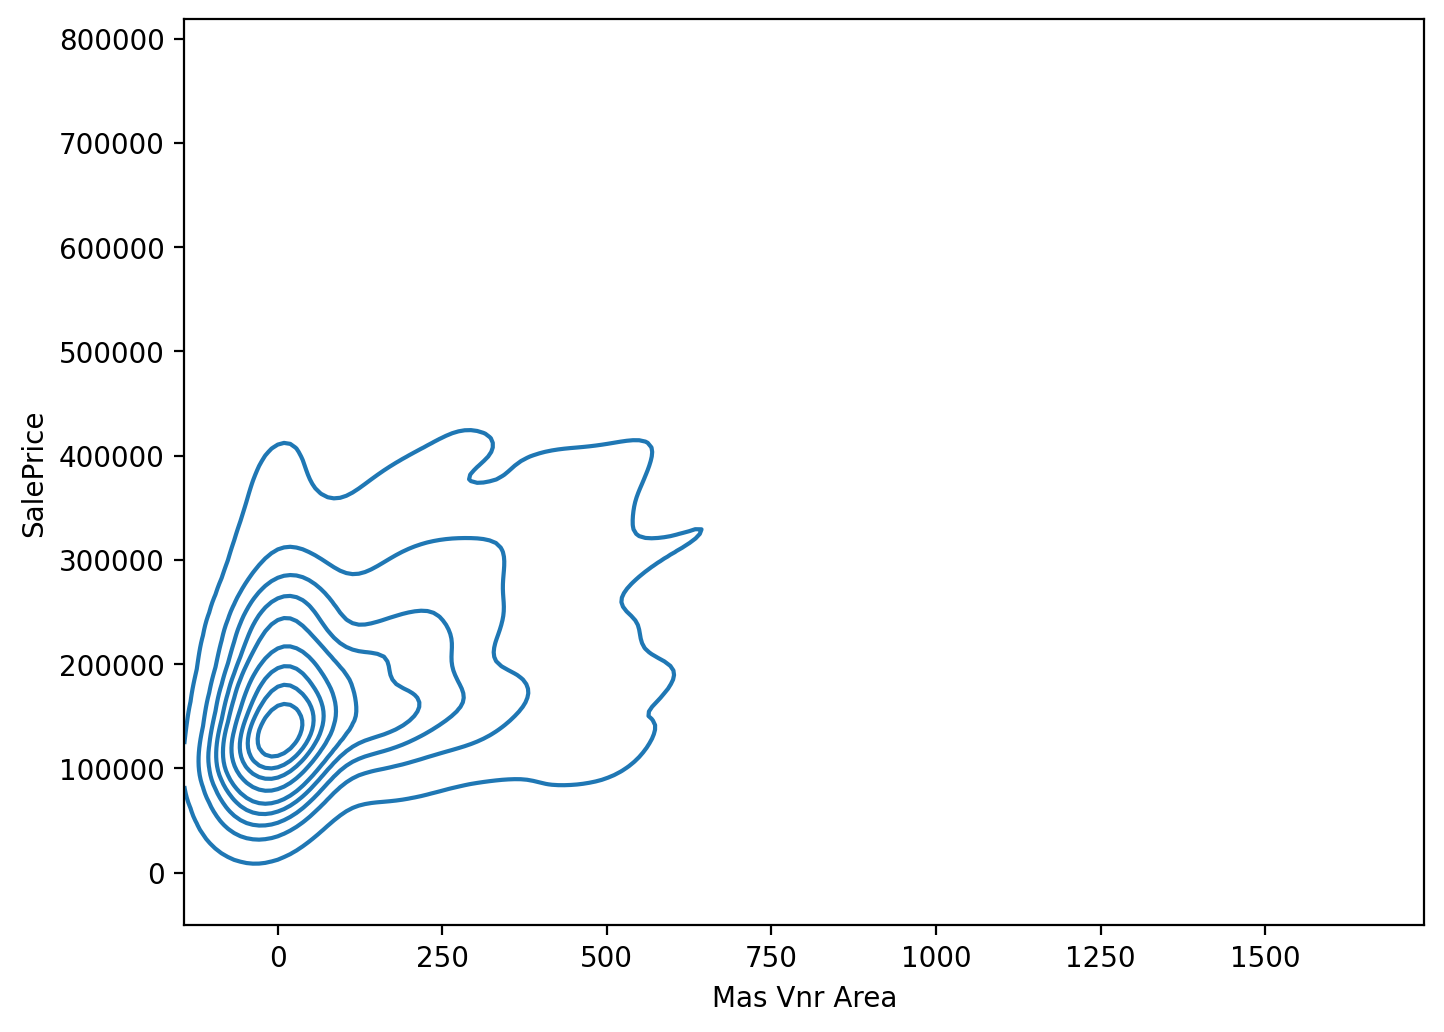

In [65]:
plt.figure(figsize=(8,6),dpi=200)
sns.kdeplot(data=new_df,x='Mas Vnr Area',y='SalePrice')
plt.show()

## #Polynomial Regression

In [66]:
X = new_df.drop(columns='SalePrice',axis=1).values
y = new_df['SalePrice'].values

## #Polynomial Feature

In [69]:
from sklearn.preprocessing import PolynomialFeatures
ploy_Feature = PolynomialFeatures(degree=2,include_bias=False)
X_polyFeature = ploy_Feature.fit_transform(X)

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_polyFeature,y,random_state=101,test_size=0.33)

## #Feature Scaling

In [71]:
from sklearn.preprocessing import StandardScaler
stdSclaler = StandardScaler()
X_train_sclar = stdSclaler.fit_transform(X_train)
X_test_sclar = stdSclaler.transform(X_test)

## #Model

In [72]:
from sklearn.linear_model import LinearRegression
poly_model = LinearRegression()

In [73]:
poly_model.fit(X_train_sclar,y_train)
y_pred_poly = poly_model.predict(X_test_sclar)

In [74]:
poly_model.coef_

array([ 1.77602746e+05,  4.76764943e+05, -9.05445644e+05,  1.67633982e+05,
       -7.13469552e+04, -1.46561801e+05, -2.02209131e+05, -3.65912623e+05,
        6.41053662e+04, -4.54717166e+03,  1.09198393e+05, -1.04982411e+05,
       -1.63507904e+05, -1.75073269e+05,  2.94998668e+03,  1.40758790e+05,
       -1.65598601e+05,  7.82642327e+03,  1.48548770e+04,  1.88594937e+04,
        2.10894880e+03, -1.73964694e+04,  6.08962642e+04, -4.93071340e+02,
       -1.86976577e+03, -1.72243722e+05, -1.36313517e+04,  2.44320532e+04,
       -5.36845747e+05, -4.91751367e+05,  1.78356651e+05,  8.32156471e+04,
        3.80020985e+05,  9.51461994e+03,  2.94750727e+05, -3.58532196e+05,
        5.21443466e+04, -1.27086563e+05,  6.33473854e+05,  7.67068039e+04,
       -1.89716727e+05,  1.01603018e+06, -1.22536854e+05,  1.38927598e+04,
       -8.72456333e+04,  2.05380435e+05,  2.28105805e+05,  1.30102429e+05,
       -4.86311777e+03,  3.14074664e+04,  2.18908871e+05,  8.97723806e+04,
       -3.90852978e+04,  

## # model performance 

In [75]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [76]:
## R2_Score
r2_score(y_test,y_pred_poly)

0.8397244987606373

In [77]:
mean_absolute_error(y_test,y_pred_poly)

18915.14012590128

In [78]:
mean_squared_error(y_test,y_pred_poly)

1010327504.5906655

## Best degree for ploynomial

In [84]:
r2_Score = [] 
for d in range(1,4):
    ploy_Feature = PolynomialFeatures(degree=d,include_bias=False)
    X_polyFeature = ploy_Feature.fit_transform(X)
    X_train,X_test,y_train,y_test = train_test_split(X_polyFeature,y,random_state=101,test_size=0.33)
    poly_model = LinearRegression()
    poly_model.fit(X_train,y_train)
    y_pred_poly = poly_model.predict(X_test)
    r2_Score.append(r2_score(y_test,y_pred_poly))
    
    

In [88]:
r2_Score

[0.722626840759834, 0.8397244996339298, -3.2692610169164826]

## #Feature Selection for to Optimize the R2_Score

In [91]:
new_df.corr()

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,1st Flr SF,Total Bsmt SF,Full Bath,Gr Liv Area,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,SalePrice
Overall Qual,1.000000,0.596796,0.569547,0.422901,0.284211,0.477640,0.547252,0.522350,0.570576,0.380175,0.392595,0.542838,0.599363,0.563337,0.799140
Year Built,0.596796,1.000000,0.612686,0.306530,0.280121,0.310180,0.407479,0.469936,0.241949,0.111429,0.170046,0.790334,0.537312,0.479998,0.558336
Year Remod/Add,0.569547,0.612686,1.000000,0.191685,0.151748,0.242028,0.297621,0.456881,0.316301,0.196916,0.133138,0.627025,0.425107,0.376160,0.532800
Mas Vnr Area,0.422901,0.306530,0.191685,1.000000,0.299892,0.392136,0.393422,0.254525,0.400768,0.278212,0.269802,0.240978,0.356617,0.370278,0.502083
BsmtFin SF 1,0.284211,0.280121,0.151748,0.299892,1.000000,0.457544,0.536604,0.077719,0.209599,0.047654,0.296001,0.189938,0.255483,0.309876,0.432958
1st Flr SF,0.477640,0.310180,0.242028,0.392136,0.457544,1.000000,0.800706,0.371651,0.562265,0.389968,0.406128,0.253604,0.439336,0.491122,0.621580
Total Bsmt SF,0.547252,0.407479,0.297621,0.393422,0.536604,0.800706,1.000000,0.325135,0.444819,0.280721,0.333007,0.336174,0.437608,0.485504,0.632260
Full Bath,0.522350,0.469936,0.456881,0.254525,0.077719,0.371651,0.325135,1.000000,0.630107,0.528506,0.229850,0.479079,0.477997,0.407279,0.545578
Gr Liv Area,0.570576,0.241949,0.316301,0.400768,0.209599,0.562265,0.444819,0.630107,1.000000,0.807800,0.455029,0.263233,0.488621,0.484711,0.706779
TotRms AbvGrd,0.380175,0.111429,0.196916,0.278212,0.047654,0.389968,0.280721,0.528506,0.807800,1.000000,0.302503,0.152989,0.355230,0.326984,0.495122


In [115]:
new_df.columns

Index(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', '1st Flr SF', 'Total Bsmt SF', 'Full Bath',
       'Gr Liv Area', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt',
       'Garage Cars', 'Garage Area', 'SalePrice'],
      dtype='object')

In [375]:
from sklearn.feature_selection import VarianceThreshold
var = VarianceThreshold(threshold=2)
X=X[:3]
var.fit(X)
var.get_support()

array([False, False, False,  True,  True,  True,  True, False,  True,
       False, False, False, False,  True])

In [412]:
new_Selected=new_df[['Overall Qual', 'Year Built', '1st Flr SF', 'Total Bsmt SF', 'Full Bath',
       'Gr Liv Area','Garage Cars', 'Garage Area', 'SalePrice']]

In [413]:
new_Selected.drop(columns='SalePrice',axis=1).values

array([[6.000e+00, 1.960e+03, 1.656e+03, ..., 1.656e+03, 2.000e+00,
        5.280e+02],
       [5.000e+00, 1.961e+03, 8.960e+02, ..., 8.960e+02, 1.000e+00,
        7.300e+02],
       [6.000e+00, 1.958e+03, 1.329e+03, ..., 1.329e+03, 1.000e+00,
        3.120e+02],
       ...,
       [5.000e+00, 1.992e+03, 9.700e+02, ..., 9.700e+02, 0.000e+00,
        0.000e+00],
       [5.000e+00, 1.974e+03, 1.389e+03, ..., 1.389e+03, 2.000e+00,
        4.180e+02],
       [7.000e+00, 1.993e+03, 9.960e+02, ..., 2.000e+03, 3.000e+00,
        6.500e+02]])

In [414]:
new_Selected['SalePrice'].values

array([215000, 105000, 172000, ..., 132000, 170000, 188000], dtype=int64)

In [415]:
X1 = new_Selected.drop(columns='SalePrice',axis=1).values
y1 = new_Selected['SalePrice'].values

In [416]:
from sklearn.preprocessing import PolynomialFeatures
ploy_Feature = PolynomialFeatures(degree=2,include_bias=False)
X_poly = ploy_Feature.fit_transform(X1)

In [417]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test = train_test_split(X_poly,y1,random_state=42,test_size=0.33)

In [418]:
from sklearn.linear_model import LinearRegression
poly_model = LinearRegression()

In [419]:
poly_model.fit(X1_train,y1_train)

LinearRegression()

In [420]:
y_pred = poly_model.predict(X1_test)

In [421]:
r2_score(y1_test,y_pred)

0.8825441329750138

In [422]:
mean_absolute_error(y1_test,y_pred)

19750.856814783725

In [393]:
mean_squared_error(y1_test,y_pred)

3298354957.016821

## #Ridge Regression

In [368]:
#Ridge Regression
from sklearn.linear_model import Ridge
reg_Ridge=Ridge(alpha=100)

In [369]:
reg_Ridge.fit(X1_train,y1_train)

Ridge(alpha=100)

In [370]:
pred_ridge=reg_Ridge.predict(X1_test)

In [371]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
MSE_ridge=mean_squared_error(y1_test,pred_ridge)
MAE_ridge=mean_absolute_error(y1_test,pred_ridge)
r2Score_ridge=r2_score(y1_test,pred_ridge)
print("MSE_ridge:- ",MSE_ridge)
print("MAE_ridge:- ",MAE_ridge)
print("r2Score_ridge:- ",r2Score_ridge)

MSE_ridge:-  1110717716.9968023
MAE_ridge:-  21554.209238295392
r2Score_ridge:-  0.8441174404643168


In [372]:
from sklearn.linear_model import RidgeCV
ridge_cv_model=RidgeCV(alphas=(0.1,1.0,10,100.0))
ridge_cv_model.fit(X1_train,y1_train)
ridge_cv_model.alpha_

1.0

In [373]:
test_predictions=ridge_cv_model.predict(X1_test)
MAE = mean_absolute_error(y_test,test_predictions)
RMSE = np.sqrt(mean_squared_error(y1_test,test_predictions))
MSE=mean_squared_error(y1_test,test_predictions)
r2_Score=r2_score(y1_test,test_predictions)

In [374]:
r2_Score

-1163.2166830275528